In [3]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
import seaborn as sns

In [16]:
def load_dataset(path):
    df = pd.read_csv(path, header=0, delimiter=',')
    return dataset

df = load_dataset('forestfires.csv')
data = df.values

In [17]:
print("Dimensionalitat de la BBDD:", dataset.shape)

Dimensionalitat de la BBDD: (517, 13)


In [18]:
df.head() 

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [19]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Neteja del dataset

In [26]:
#Mirem si tenim alguna dada amb nul al dataset
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

Comprovem els outliers

<IPython.core.display.Javascript object>


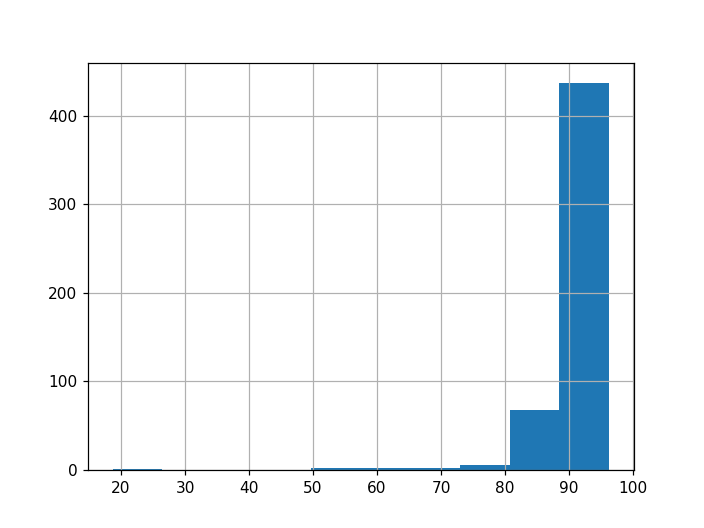

In [37]:
#Tenim un valor molt allunyat a 20
df.FFMC.hist()

<IPython.core.display.Javascript object>


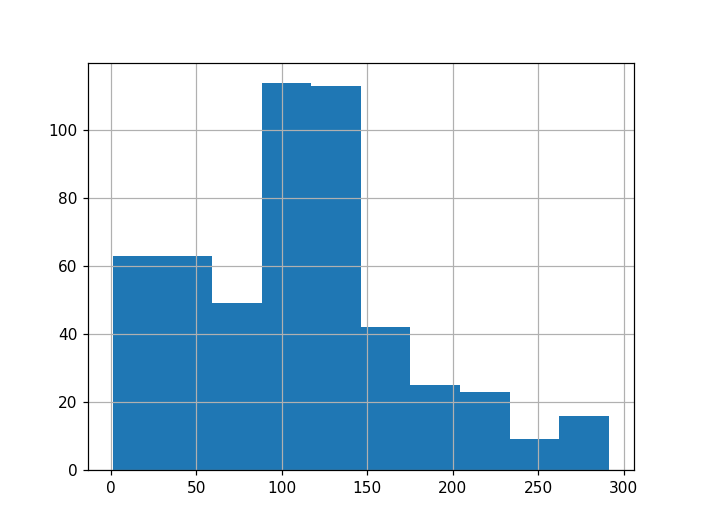

In [38]:
df.DMC.hist()

<IPython.core.display.Javascript object>


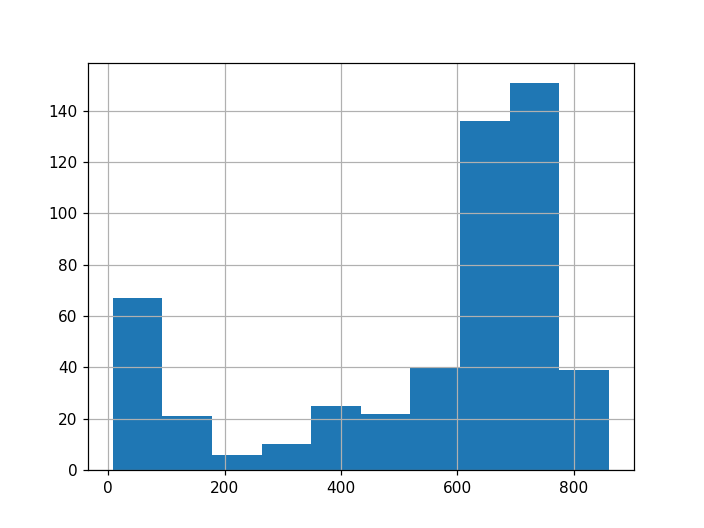

In [39]:
df.DC.hist()

<IPython.core.display.Javascript object>


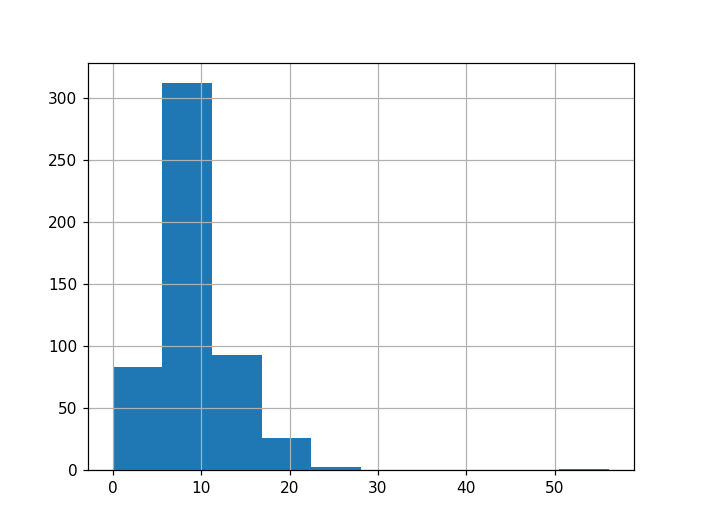

In [40]:
#Valor molt allunyat sobre el 50
df.ISI.hist()

<IPython.core.display.Javascript object>


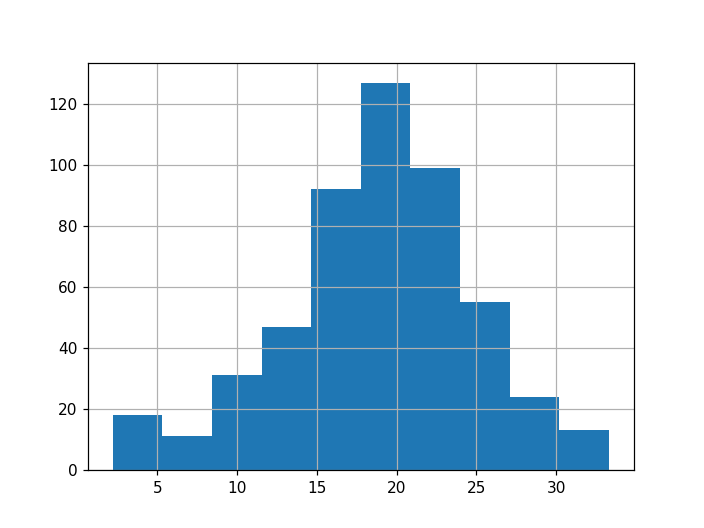

In [41]:
df.temp.hist()

<IPython.core.display.Javascript object>


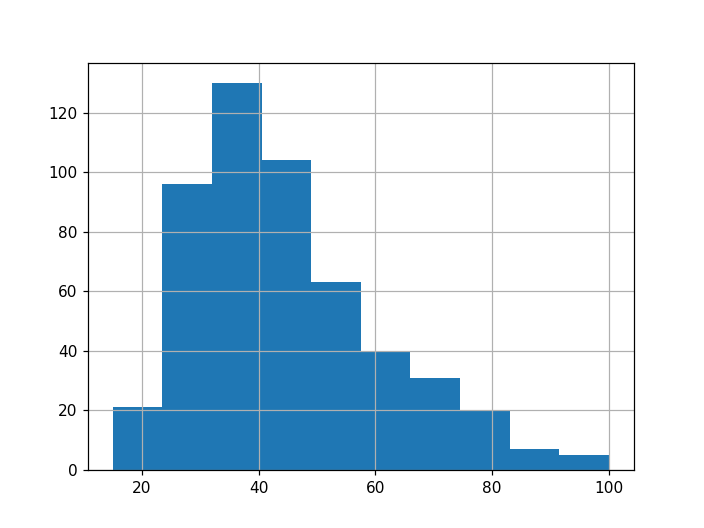

In [42]:
df.RH.hist()

<IPython.core.display.Javascript object>


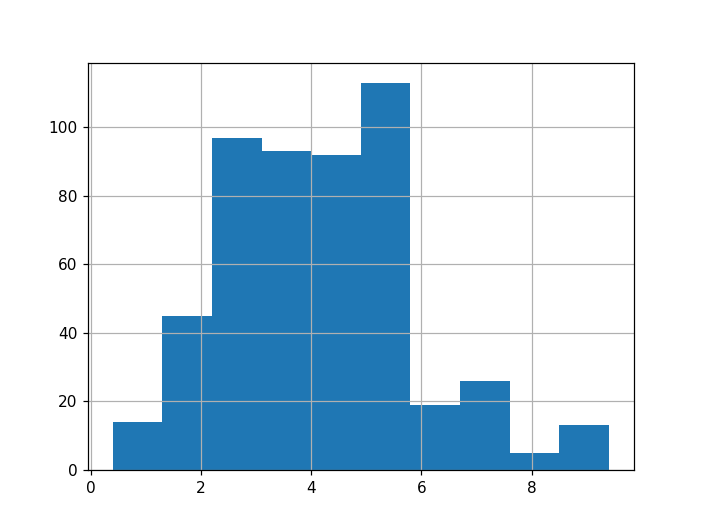

In [43]:
df.wind.hist()

<IPython.core.display.Javascript object>


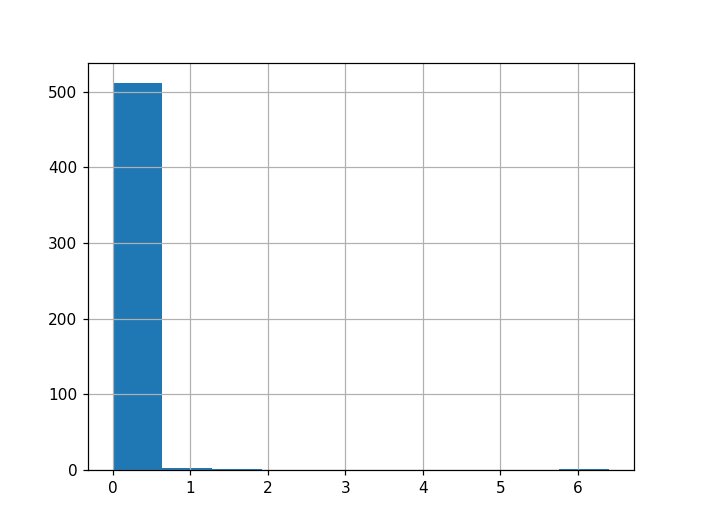

In [44]:
#Valor molt llunya al 6
df.rain.hist()

<IPython.core.display.Javascript object>


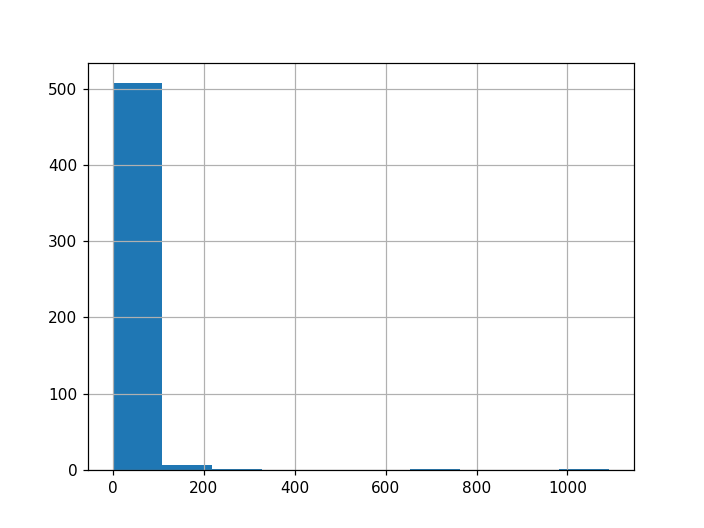

In [46]:
#Valor molt llunya al 1000
df.area.hist()